## Yatsa Data Analytics

Yatsa is a company that provides asset tracking and management solutions to individuals. The purpose of this notebook is to provide a brief overview of the data collected by Yatsa from its users' assets and their trips.
The primary objective of the analytics conducted on this data is to device valuable insights and address key business questions, such as:
1.  What is the average distance travelled by vehicles in a day, week or month? Or weekdays vs weekends?
2.  What are the most common destination for vehicles and how frequent do they travel to  these destinations?

### Extra
3.  Any trends in driver behaviour for example speeding?
4.  Any pattern or trends in the types of trips made by vehicles for example: do smaller vehicles travel     through smaller distances.

## Loading the data and preprocessing it for analysis and visualization 

Loaded the data from the json files into a pandas dataframe. The Data is stored in the data folder in the root directory of the project.

In [1]:
import pandas as pd
assets = pd.read_json('Data/assets.json')

In [2]:
# Check the first five rows of the assets dataframe
assets.head()

,id,make,model,year
0,QRmYjfT,TOYOTA Ractis 1.0,Ractis 1.0,2006.0
1,DpXMzg3,Lexus CT 200h,CT 200h,NaN
2,4tQe9sV,Honda Odyssey,Odyssey,NaN
3,x2LJWsl,MITSUBISHI Lancer Cedia LA-CS2A,Lancer Cedia LA-CS2A,2005.0
4,eH0O4bf,Nissan,Note,2011.0


In [3]:
# Check for unique assets make 
assets['make'].unique()

array(['TOYOTA Ractis 1.0', 'Lexus CT 200h', 'Honda Odyssey',
       'MITSUBISHI Lancer Cedia LA-CS2A', 'Nissan', 'MAZDA Demio',
       'TOYOTA HIACE', 'SUZUKI EVERY', 'TOYOTA', 'Mitsubishi', 'BAJAJ',
       'PIAGGIO', 'NISSAN MARCH/micra/MT',
       'TOYOTA HILUX  TGN26R - Manual', 'TOYOTA COROLLA', 'tuk tuk',
       'BMW F650 GS 218', 'HAOJIN', 'CAR', 'Tuk Tuk', 'PEUGEOT 207',
       'TOYOTA PROBOX', 'TUK TUK', 'HONDA',
       'NISSAN X-TRAIL Mpfi CVT(NEW) NT32', 'LEXUS NX 300H CVT', 'NOAH',
       'MARUTI', 'Car'], dtype=object)

In [5]:
# loading the trips json file using json.load() method and storing it in a variable called trips
import json
with open('Data/trips.json') as f:
    trips = json.load(f)

In [8]:
# trips is a list of dictionaries. Each dictionary represents a trip made by a vehicle. Queried the first dictionary in the list
print(trips[0])

{'id': '35Ldjpf', 'created': '2022-03-14T17:31:51.003+00:00', 'asset_id': '0ROajub', 'origin': {'latitude': -1.043220043182373, 'longitude': 37.067928314208984, 'time_stamp': '2022-03-14T17:31:47+00:00', 'address': 'Thika Garissa Highway, Total, Thika, Kenya', 'odometer': None}, 'destination': {'latitude': -1.041213035583496, 'longitude': 37.09260177612305, 'time_stamp': '2022-03-14T17:54:07+00:00', 'address': 'Kenyatta Highway, Thika, Kiambu County, Kenya', 'odometer': None}, 'distance': 4321.65, 'points': [{'bearing': 0.0, 'location': {'latitude': -1.0429808391339757, 'longitude': 37.06797081001906}, 'original_index': 0, 'place_id': 'ChIJZdR1aZNOLxgRKyV34jTxzi8'}, {'bearing': -79.92785342956121, 'location': {'latitude': -1.0429532741480045, 'longitude': 37.06781559845453}, 'original_index': 1, 'place_id': 'ChIJZdR1aZNOLxgRKyV34jTxzi8'}, {'bearing': -79.92785060439225, 'location': {'latitude': -1.0429239, 'longitude': 37.067650199999996}, 'original_index': 0, 'place_id': 'ChIJZdR1aZNO

In [36]:
# created a columns list and appended the unique keys in the dictionaries in the trips list dictionaries to the columns list
columns = []
# manually appended the id, created, asset_id and distance keys to the columns list
columns.append('id')
columns.append('created')
columns.append('asset_id')
columns.append('distance')
# getting the nested key-value pairs in the origin, destination and points keys
data_origin = trips[3]['origin']
data_destination = trips[4]['destination']
data_points = trips[6]['points'][0]
# looping through the origin keys and appending them to the columns list
for key in data_origin.keys():
    if key not in columns:
        columns.append('origin_' + key)
# looping through the destination keys and appending them to the columns list
for key in data_destination.keys():
    if key not in columns:
        columns.append('destination_' + key)
# looping through the points keys and appending them to the columns list
for k, v in data_points.items():
    if k not in columns:
        if k == 'location':
            for key in v.keys():
                if key not in columns:
                    columns.append('point_' + key)
        else:
            columns.append('point_' + k)
print(columns)


['id', 'created', 'asset_id', 'distance', 'origin_latitude', 'origin_longitude', 'origin_time_stamp', 'origin_address', 'origin_odometer', 'destination_latitude', 'destination_longitude', 'destination_time_stamp', 'destination_address', 'destination_odometer', 'point_bearing', 'point_latitude', 'point_longitude', 'point_original_index', 'point_place_id']


In [5]:
# created an empty dataframe called trips_df with the columns list as the columns
trips_df = pd.DataFrame(columns=columns)

After creating an empty dataframe with columns from unique keys from `trips.json` file, now data is loaded into the dataframe.

In [42]:
# looping throught the trips list of dictionaries and populating the data in the trips_df dataframe
for i, trip in enumerate(trips):
    trips_df.loc[i, 'id'] = trip['id']
    trips_df.loc[i, 'created'] = trip['created']
    trips_df.loc[i, 'asset_id'] = trip['asset_id']
    trips_df.loc[i, 'distance'] = trip['distance']
    for key, value in trip['origin'].items():
        trips_df.loc[i, 'origin_' + key] = value
    for key, value in trip['destination'].items():
        trips_df.loc[i, 'destination_' + key] = value
    for i, v in enumerate(trip['points']):
        for key, value in v.items():
            if key == 'location':
                for k, v in value.items():
                    trips_df.loc[i, 'point_' + k] = v
            else:
                trips_df.loc[i, 'point_' + key] = value

In [44]:
# save the trips_df to csv file
trips_df.to_csv('Data/trips_df.csv', index=False)

In [7]:
# save the assets_df to csv file
assets.to_csv('Data/assets_df.csv', index=False)

## Explorative Data Analysis

In [4]:
# Loading the trips_df csv file
trips_df = pd.read_csv('Data/trips_df.csv')

In [5]:
trips_df.shape

(6703, 19)

In [6]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,origin_odometer,destination_latitude,destination_longitude,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,0.0,4804.000000,4804.000000,0.0,6703.000000,6703.000000,6703.000000,6703.000000
mean,11241.547325,-1.033155,36.911776,NaN,-1.033224,36.911758,NaN,-15.064304,-0.404014,36.305245,6.828883
std,20407.447419,0.433675,0.411567,NaN,0.435225,0.411621,NaN,74.698946,0.846147,0.891082,20.025799
min,101.510000,-3.229457,34.215324,NaN,-3.328162,34.217648,NaN,-180.000000,-1.295174,34.998313,0.000000
25%,1634.500000,-1.248051,36.824792,NaN,-1.249770,36.824720,NaN,-53.565599,-1.040912,35.256035,0.000000
50%,4962.310000,-1.126192,36.995655,NaN,-1.126177,36.993961,NaN,0.000000,-1.036796,37.051986,0.000000
75%,11809.925000,-1.051952,37.092146,NaN,-1.051691,37.092073,NaN,0.000000,0.521471,37.072456,0.000000
max,342478.600000,1.256370,40.124302,NaN,1.256327,40.126652,NaN,180.000000,1.024317,37.094406,99.000000


In [7]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4804 non-null   object 
 1   created                 4804 non-null   object 
 2   asset_id                4804 non-null   object 
 3   distance                4804 non-null   float64
 4   origin_latitude         4804 non-null   float64
 5   origin_longitude        4804 non-null   float64
 6   origin_time_stamp       4804 non-null   object 
 7   origin_address          4803 non-null   object 
 8   origin_odometer         0 non-null      float64
 9   destination_latitude    4804 non-null   float64
 10  destination_longitude   4804 non-null   float64
 11  destination_time_stamp  4804 non-null   object 
 12  destination_address     4803 non-null   object 
 13  destination_odometer    0 non-null      float64
 14  point_bearing           6703 non-null   

In [7]:
trips_df.dtypes

id                         object
created                    object
asset_id                   object
distance                  float64
origin_latitude           float64
origin_longitude          float64
origin_time_stamp          object
origin_address             object
origin_odometer           float64
destination_latitude      float64
destination_longitude     float64
destination_time_stamp     object
destination_address        object
destination_odometer      float64
point_bearing             float64
point_latitude            float64
point_longitude           float64
point_original_index        int64
point_place_id             object
dtype: object

In [8]:
assets.shape

(34, 4)

In [9]:
assets.isnull().sum()

id        0
make      0
model    13
year     15
dtype: int64

In [10]:
trips_df.isnull().sum()

id                        1899
created                   1899
asset_id                  1899
distance                  1899
origin_latitude           1899
origin_longitude          1899
origin_time_stamp         1899
origin_address            1900
origin_odometer           6703
destination_latitude      1899
destination_longitude     1899
destination_time_stamp    1899
destination_address       1900
destination_odometer      6703
point_bearing                0
point_latitude               0
point_longitude              0
point_original_index         0
point_place_id               0
dtype: int64

In [11]:
# drop the columns whose entire column is null
trips_df.dropna(axis=1, how='all', inplace=True)

In [12]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,6703.000000,6703.000000,6703.000000,6703.000000
mean,11241.547325,-1.033155,36.911776,-1.033224,36.911758,-15.064304,-0.404014,36.305245,6.828883
std,20407.447419,0.433675,0.411567,0.435225,0.411621,74.698946,0.846147,0.891082,20.025799
min,101.510000,-3.229457,34.215324,-3.328162,34.217648,-180.000000,-1.295174,34.998313,0.000000
25%,1634.500000,-1.248051,36.824792,-1.249770,36.824720,-53.565599,-1.040912,35.256035,0.000000
50%,4962.310000,-1.126192,36.995655,-1.126177,36.993961,0.000000,-1.036796,37.051986,0.000000
75%,11809.925000,-1.051952,37.092146,-1.051691,37.092073,0.000000,0.521471,37.072456,0.000000
max,342478.600000,1.256370,40.124302,1.256327,40.126652,180.000000,1.024317,37.094406,99.000000


In [13]:
# limit the trips_df to 4804 rows
trips_df = trips_df.iloc[:4804, :]

In [14]:
trips_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            1
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       1
point_bearing             0
point_latitude            0
point_longitude           0
point_original_index      0
point_place_id            0
dtype: int64

In [15]:
trips_df[trips_df['origin_address'].isnull() | trips_df['destination_address'].isnull()]

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
922,v0Wgz5c,2022-11-06T01:11:56.532+00:00,QRmYjfT,862.05,-1.18568,36.744983,2022-11-06T01:11:50+00:00,NaN,-1.185388,36.748775,2022-11-06T01:16:28+00:00,NaN,0.0,-1.035254,37.075637,0,ChIJI7NjvYVOLxgRfpELFek-IkY


In [16]:
trips_df.dropna(subset=['origin_address', 'destination_address'], inplace=True)

In [17]:
trips_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            0
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       0
point_bearing             0
point_latitude            0
point_longitude           0
point_original_index      0
point_place_id            0
dtype: int64

In [18]:
trips_df['distance'].mean()

11243.70836976889

In [19]:
trips_df['created'] = pd.to_datetime(trips_df['created'])
trips_df['created_day'] = trips_df['created'].dt.day_name()
trips_df['created_week'] = trips_df['created'].dt.week
trips_df['created_month'] = trips_df['created'].dt.month

<ipython-input-19-0c69341cac91>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  trips_df['created_week'] = trips_df['created'].dt.week


In [20]:
# categorize the trips made based on the year
trips_df['created_year'] = trips_df['created'].dt.year

In [21]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,...,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,created_day,created_week,created_month,created_year
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,...,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,Monday,11,3,2022
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,...,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,Tuesday,10,3,2023
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,...,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,Tuesday,10,3,2023
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,...,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,Tuesday,10,3,2023
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,...,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,Tuesday,10,3,2023


In [22]:
trips_df.groupby('created_day')['id'].count()

created_day
Friday       722
Monday       704
Saturday     801
Sunday       598
Thursday     649
Tuesday      643
Wednesday    686
Name: id, dtype: int64

In [23]:
trips_df.groupby('created_day')['distance'].mean()

created_day
Friday       12199.504335
Monday       10685.072330
Saturday     11838.385256
Sunday       11096.259783
Thursday     11872.232419
Tuesday      10256.826641
Wednesday    10575.612157
Name: distance, dtype: float64

In [24]:
trips_df.groupby('created_week')['distance'].mean()

created_week
1     11314.148857
2      5040.174857
3     10277.398500
4     13842.073500
5      8740.816307
6      7984.538346
7      9636.384235
8      9625.121792
9     10890.477687
10    12596.259706
11     4321.650000
12     6645.122941
13     1712.585000
17     9102.640270
18    10128.154479
19    16731.929545
20    17654.280909
21     7760.119394
22    10630.829167
23    21546.111500
24    21153.024400
25    16391.706667
26    29978.595000
27    15471.029804
28     8543.555000
29     5796.229000
30     4166.194000
31    17931.975000
32     1716.628000
33     3728.954000
34     8331.772353
35     4842.061563
36     8606.825714
37     3658.766383
38     7815.842833
39    18382.953380
40     7648.293947
41    14536.382925
42    13435.137679
43     8315.178161
44    10738.630893
45     6661.445648
46     8716.652707
47    15826.582831
48    15858.567615
49    15139.448235
50    11032.953871
51    17455.789180
52     9614.624324
Name: distance, dtype: float64

In [25]:
trips_df.groupby('created_month')['distance'].mean()

created_month
1     10762.353975
2      9002.992650
3     11522.344992
4      7660.103898
5     12837.588539
6     21226.067136
7     16893.984600
8      6251.707179
9      9522.650697
10    11883.782965
11    11602.082706
12    13755.635497
Name: distance, dtype: float64

In [ ]:
# assign indexes for the created_day column i.e Monday - 0, Tuesday - 1, Wednesday - 2, Thursday - 3, Friday - 4, Saturday - 5, Sunday - 6
trips_df['created_day'] = pd.Categorical(trips_df['created_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

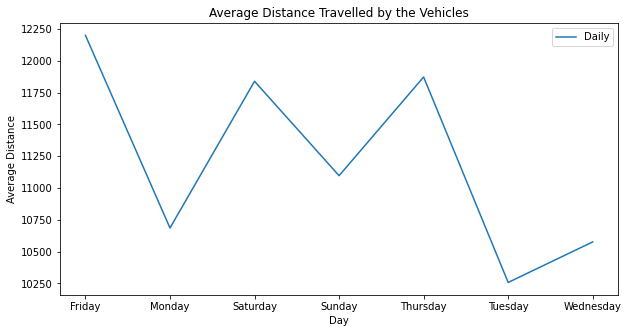

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_day')['distance'].mean(), label='Daily')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

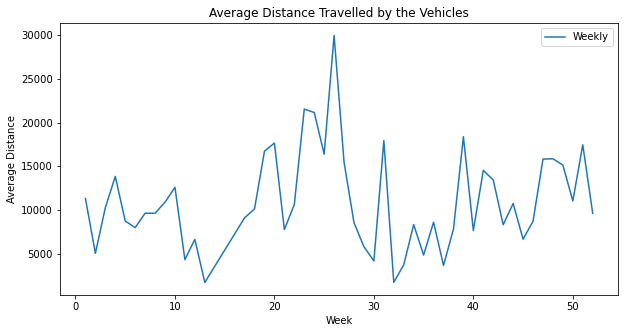

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_week')['distance'].mean(), label='Weekly')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

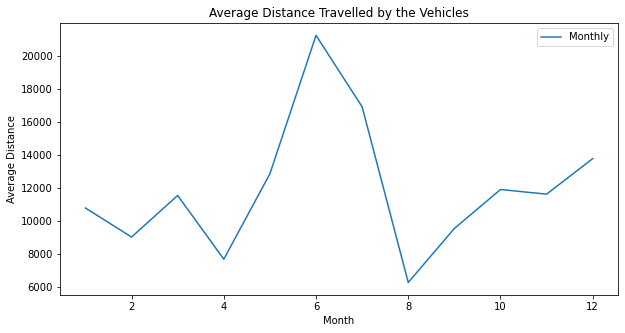

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_month')['distance'].mean(), label='Monthly')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

In [28]:
# compare the average distance covered in the weekdays vs weekends
trips_df['created_dayofweek'] = trips_df['created'].dt.dayofweek
trips_df['created_dayofweek'] = trips_df['created_dayofweek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [29]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,...,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,created_day,created_week,created_month,created_dayofweek
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,...,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,Monday,11,3,Weekday
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,...,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,Tuesday,10,3,Weekday
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,...,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,Tuesday,10,3,Weekday
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,...,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,Tuesday,10,3,Weekday
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,...,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,Tuesday,10,3,Weekday


In [30]:
trips_df.groupby('created_dayofweek')['distance'].mean()

created_dayofweek
Weekday    11129.677250
Weekend    11521.165075
Name: distance, dtype: float64

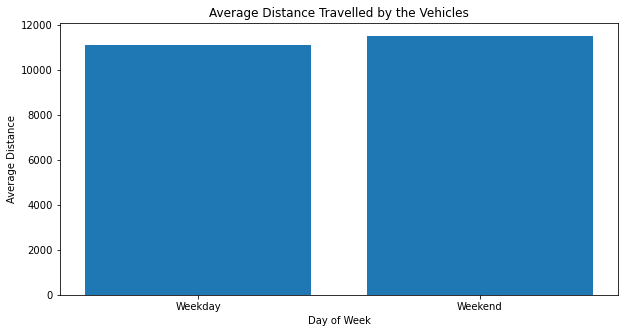

In [31]:
# Use visualization to compare the average distance covered in the weekdays vs weekends
plt.figure(figsize=(10, 5))
plt.bar(trips_df.groupby('created_dayofweek')['distance'].mean().index, trips_df.groupby('created_dayofweek')['distance'].mean())
plt.xlabel('Day of Week')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

In [32]:
trips_df['destination_address'].value_counts().head(10)

Thika, Kiambu County, Kenya                                             466
Ruiru, Kiambu County, Kenya                                             181
Kiandutu Slums, Thika, Kiambu County, Kenya                             175
A3, Thika, Kiambu County, Kenya                                         158
Super Highway, Ruiru, Kenya                                             123
Kianyaga, Kirinyaga County, Kenya                                       116
Eastern By Pass, Ruiru, Kiambu County, Kenya                            109
Makongeni, Thika, Kiambu County, Kenya                                  106
Kiganjo - British American Tobacco Road, Thika, Kiambu County, Kenya     88
Mitero Road, Ndathi, Nyeri County, Kenya                                 78
Name: destination_address, dtype: int64

In [33]:
# How frequently do the vehicles travel to the common origin address for the trips
trips_df[trips_df['destination_address'] == 'Thika, Kiambu County, Kenya'].value_counts()

id       created                           asset_id  distance  origin_latitude  origin_longitude  origin_time_stamp          origin_address                                                        destination_latitude  destination_longitude  destination_time_stamp     destination_address          point_bearing  point_latitude  point_longitude  point_original_index  point_place_id               created_day  created_week  created_month  created_dayofweek
00u06no  2023-02-28 14:37:23.549000+00:00  3XBsRFw   14689.55  -1.041613        37.066196         2023-02-28T14:37:20+00:00  A3, Thika, Kiambu County, Kenya                                       -1.035346             37.048599              2023-02-28T16:30:40+00:00  Thika, Kiambu County, Kenya  -46.558933      0.584230       35.216301        0                     ChIJp4RwjH8HgRcRdVasIVNh5WI  Tuesday      9             2              Weekday              1
hQFSnFE  2022-12-31 17:50:14.072000+00:00  86sWwU3   1879.70   -1.062752        37.11

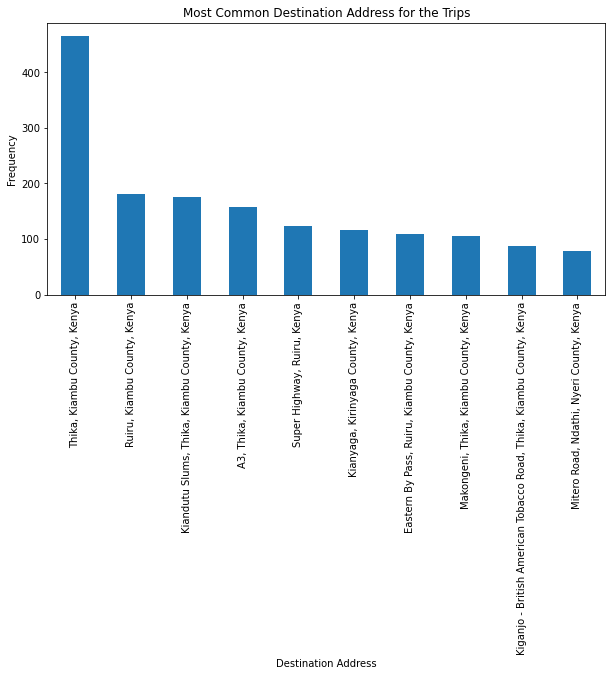

In [34]:
# Visualization to represent the most common destination address for the trips
plt.figure(figsize=(10, 5))
trips_df['destination_address'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Destination Address')
# plt.xticks(rotation=30)
plt.ylabel('Frequency')
plt.title('Most Common Destination Address for the Trips')
plt.show()

In [35]:
trips_df['origin_time_stamp'] = pd.to_datetime(trips_df['origin_time_stamp'])
trips_df['destination_time_stamp'] = pd.to_datetime(trips_df['destination_time_stamp'])

In [36]:
# create a column named average_speed to represent the average speed of the vehicles during the trips
trips_df['duration_seconds'] = (trips_df['destination_time_stamp'] - trips_df['origin_time_stamp']).dt.total_seconds()
trips_df['average_speed'] = trips_df['distance'] /trips_df['duration_seconds']

In [37]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,...,point_latitude,point_longitude,point_original_index,point_place_id,created_day,created_week,created_month,created_dayofweek,duration_seconds,average_speed
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,...,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,Monday,11,3,Weekday,1340.0,3.225112
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,...,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,Tuesday,10,3,Weekday,4796.0,5.150801
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,...,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,Tuesday,10,3,Weekday,6256.0,4.905574
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,...,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,Tuesday,10,3,Weekday,4647.0,5.295748
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,...,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,Tuesday,10,3,Weekday,6256.0,4.538956


In [38]:
# convert the average speed from m/s to km/h
trips_df['average_speed'] = trips_df['average_speed'] * 3.6

In [ ]:
# do average speed line plot comparing the average speed of the vehicles over the years
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_year')['average_speed'].mean(), label='Yearly')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average Speed')
plt.title('Average Speed of the Vehicles')
plt.show()
# convert the created_year column to int type
trips_df['created_year'] = trips_df['created_year'].astype(int)

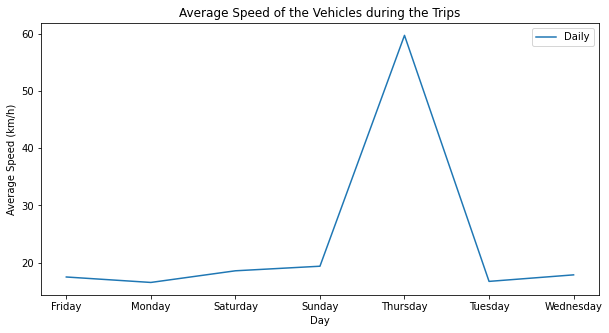

In [39]:
# Identify any trends in the average speed of the vehicles during the trips over time (day, week, month)
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_day')['average_speed'].mean(), label='Daily')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Speed of the Vehicles during the Trips')
plt.show()

In [99]:
# save the trips_df to csv file
# trips_df.to_csv('Data/trips_df_refined.csv', index=False)

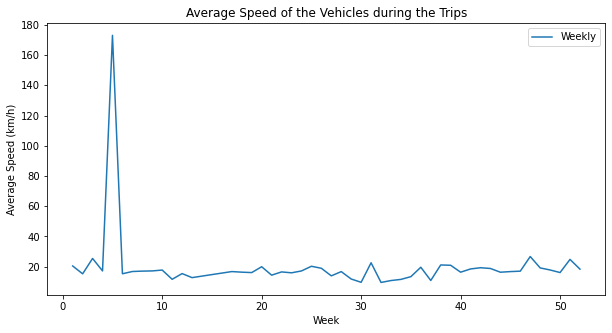

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_week')['average_speed'].mean(), label='Weekly')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Speed of the Vehicles during the Trips')
plt.show()

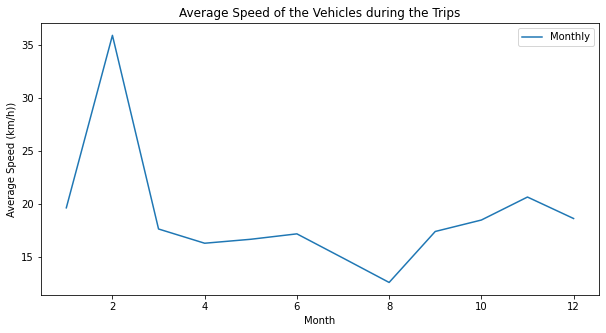

In [41]:
# Identify any trends in the average speed of the vehicles during the trips over time (day, week, month)
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_month')['average_speed'].mean(), label='Monthly')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Speed (km/h))')
plt.title('Average Speed of the Vehicles during the Trips')
plt.show()

In [42]:
assets['make_category'] = assets['make'].apply(lambda x: 'small' if x in ['SUZUKI EVERY', 'BAJAJ', 'PIAGGIO', 'tuk tuk', 'TUK TUK', 'Maruti'] else 'medium')

In [43]:
assets.isnull().sum()

id                0
make              0
model            13
year             15
make_category     0
dtype: int64

In [44]:
# merge the trips_df and assets_df to get the vehicle details for each trip in the trips_df dataframe
merged_df = pd.merge(trips_df, assets, left_on='asset_id', right_on='id', how='left')
merged_df

,id_x,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,...,created_week,created_month,created_dayofweek,duration_seconds,average_speed,id_y,make,model,year,make_category
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,...,11,3,Weekday,1340.0,11.610403,0ROajub,HONDA,None,NaN,medium
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,...,10,3,Weekday,4796.0,18.542882,0gMAW5w,TOYOTA,Hiace,2003.0,medium
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,...,10,3,Weekday,6256.0,17.660066,0gMAW5w,TOYOTA,Hiace,2003.0,medium
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,...,10,3,Weekday,4647.0,19.064692,0gMAW5w,TOYOTA,Hiace,2003.0,medium
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,...,10,3,Weekday,6256.0,16.340242,0gMAW5w,TOYOTA,Hiace,2003.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,GeaklYd,2023-02-21 11:41:10.948000+00:00,3XBsRFw,13803.78,-1.040364,37.069199,2023-02-21 11:41:06+00:00,"385 Mombasa Road, Thika, Kiambu County, Kenya",-1.040391,37.069256,...,8,2,Weekday,3545.0,14.017943,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small
4799,NSzqS6B,2023-02-21 10:17:02.952000+00:00,3XBsRFw,4968.03,-1.040324,37.069244,2023-02-21 10:16:54+00:00,"385 OAU Road, Thika, Kiambu County, Kenya",-1.040152,37.068432,...,8,2,Weekday,1251.0,14.296489,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small
4800,jMW6L4T,2023-02-21 09:15:30.916000+00:00,3XBsRFw,10180.62,-1.047289,37.073498,2023-02-21 09:15:27+00:00,"Garissa Road, Thika, Kiambu County, Kenya",-1.040326,37.069077,...,8,2,Weekday,3013.0,12.164033,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small
4801,pNnBGll,2023-02-21 08:41:38.993000+00:00,3XBsRFw,3134.15,-1.042714,37.068249,2023-02-21 08:41:32+00:00,"30, Thika, Kenya",-1.047387,37.073387,...,8,2,Weekday,596.0,18.931107,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small


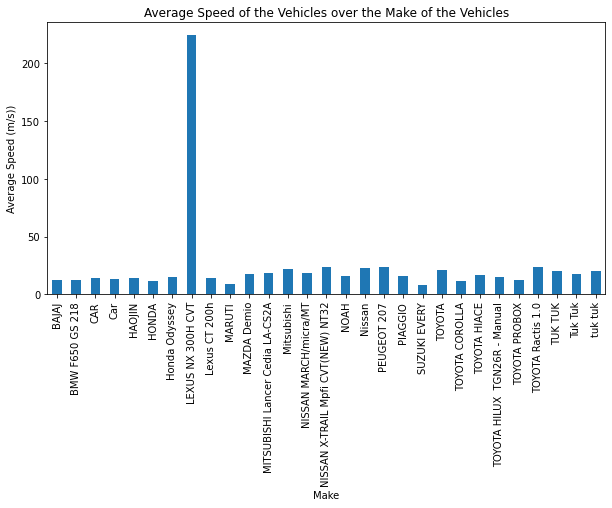

In [45]:
# plot the average speed of the vehicles over the make of the vehicles
plt.figure(figsize=(10, 5))
merged_df.groupby('make')['average_speed'].mean().plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Average Speed (m/s))')
plt.title('Average Speed of the Vehicles over the Make of the Vehicles')
plt.show()

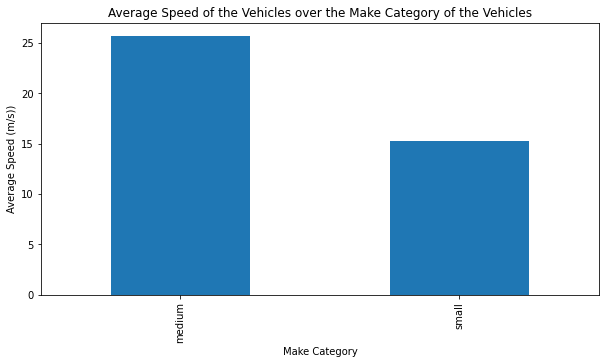

In [46]:
# visualize the average speed of the vehicles over the make category of the vehicles
plt.figure(figsize=(10, 5))
merged_df.groupby('make_category')['average_speed'].mean().plot(kind='bar')
plt.xlabel('Make Category')
plt.ylabel('Average Speed (m/s))')
plt.title('Average Speed of the Vehicles over the Make Category of the Vehicles')
plt.show()

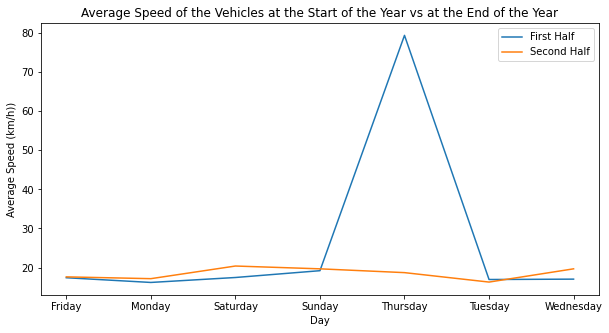

In [47]:
# provide visualization to explain the difference in average speed of the vehicles at the start of the year vs at the end of the year
plt.figure(figsize=(10, 5))
# let the days be ordered starting from Monday to Sunday
plt.plot(merged_df[merged_df['created_month'] < 7].groupby('created_day')['average_speed'].mean(), label='First Half')
plt.plot(merged_df[merged_df['created_month'] >= 7].groupby('created_day')['average_speed'].mean(), label='Second Half')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Speed (km/h))')
plt.title('Average Speed of the Vehicles at the Start of the Year vs at the End of the Year')
plt.show()

In [48]:
# assets make making most of the trips
merged_df['make'].value_counts().head(10)

TOYOTA                             450
PIAGGIO                            450
CAR                                300
TOYOTA PROBOX                      150
TOYOTA HIACE                       150
Tuk Tuk                            150
TOYOTA COROLLA                     150
MITSUBISHI Lancer Cedia LA-CS2A    150
Nissan                             150
Mitsubishi                         150
Name: make, dtype: int64

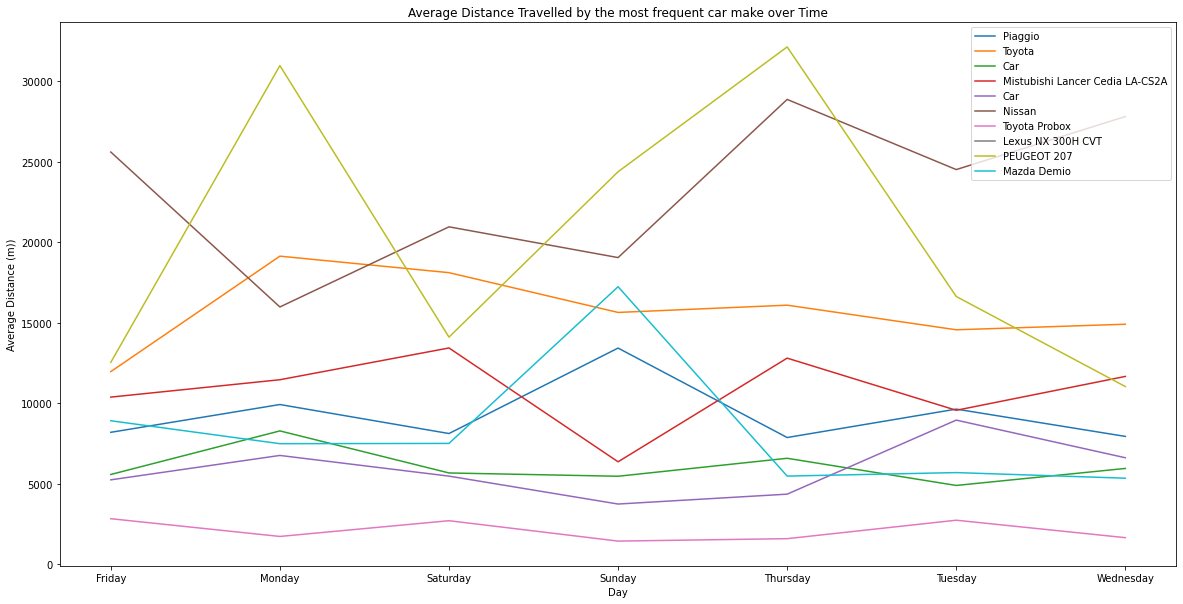

In [49]:
# identify trends in trips_df dataframe over time (day, week, month) for the different vehicle makes and make categories (small, medium)
plt.figure(figsize=(20, 10))
plt.plot(merged_df[merged_df['make'] == 'PIAGGIO'].groupby('created_day')['distance'].mean(), label='Piaggio')
plt.plot(merged_df[merged_df['make'] == 'TOYOTA'].groupby('created_day')['distance'].mean(), label='Toyota')
plt.plot(merged_df[merged_df['make'] == 'CAR'].groupby('created_day')['distance'].mean(), label='Car')
plt.plot(merged_df[merged_df['make'] == 'MITSUBISHI Lancer Cedia LA-CS2A'].groupby('created_day')['distance'].mean(), label='Mistubishi Lancer Cedia LA-CS2A')
plt.plot(merged_df[merged_df['make'] == 'Car'].groupby('created_day')['distance'].mean(), label='Car')
plt.plot(merged_df[merged_df['make'] == 'Nissan'].groupby('created_day')['distance'].mean(), label='Nissan')
plt.plot(merged_df[merged_df['make'] == 'TOYOTA PROBOX'].groupby('created_day')['distance'].mean(), label='Toyota Probox')
plt.plot(merged_df[merged_df['make'] == 'Lexus NX 300H CVT'].groupby('created_day')['distance'].mean(), label='Lexus NX 300H CVT')
plt.plot(merged_df[merged_df['make'] == 'PEUGEOT 207'].groupby('created_day')['distance'].mean(), label='PEUGEOT 207')
plt.plot(merged_df[merged_df['make'] == 'MAZDA Demio'].groupby('created_day')['distance'].mean(), label='Mazda Demio')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Distance (m))')
plt.title('Average Distance Travelled by the most frequent car make over Time')
plt.show()

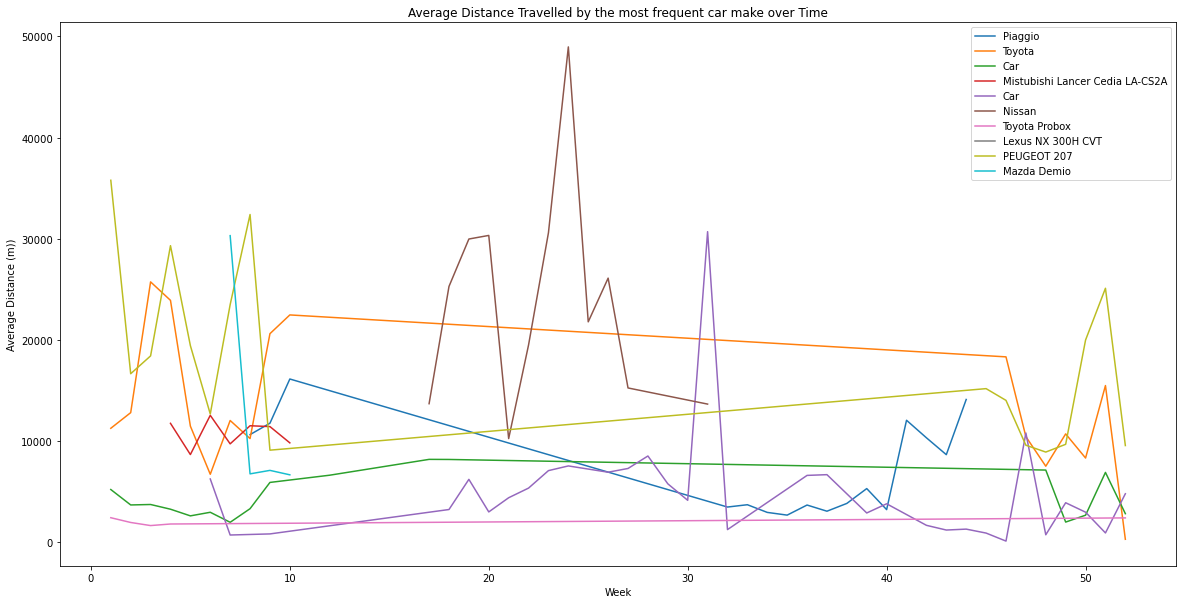

In [50]:
# identify trends in trips_df dataframe over time (day, week, month) for the different vehicle makes and make categories (small, medium)
plt.figure(figsize=(20, 10))
plt.plot(merged_df[merged_df['make'] == 'PIAGGIO'].groupby('created_week')['distance'].mean(), label='Piaggio')
plt.plot(merged_df[merged_df['make'] == 'TOYOTA'].groupby('created_week')['distance'].mean(), label='Toyota')
plt.plot(merged_df[merged_df['make'] == 'CAR'].groupby('created_week')['distance'].mean(), label='Car')
plt.plot(merged_df[merged_df['make'] == 'MITSUBISHI Lancer Cedia LA-CS2A'].groupby('created_week')['distance'].mean(), label='Mistubishi Lancer Cedia LA-CS2A')
plt.plot(merged_df[merged_df['make'] == 'Car'].groupby('created_week')['distance'].mean(), label='Car')
plt.plot(merged_df[merged_df['make'] == 'Nissan'].groupby('created_week')['distance'].mean(), label='Nissan')
plt.plot(merged_df[merged_df['make'] == 'TOYOTA PROBOX'].groupby('created_week')['distance'].mean(), label='Toyota Probox')
plt.plot(merged_df[merged_df['make'] == 'Lexus NX 300H CVT'].groupby('created_week')['distance'].mean(), label='Lexus NX 300H CVT')
plt.plot(merged_df[merged_df['make'] == 'PEUGEOT 207'].groupby('created_week')['distance'].mean(), label='PEUGEOT 207')
plt.plot(merged_df[merged_df['make'] == 'MAZDA Demio'].groupby('created_week')['distance'].mean(), label='Mazda Demio')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Average Distance (m))')
plt.title('Average Distance Travelled by the most frequent car make over Time')
plt.show()

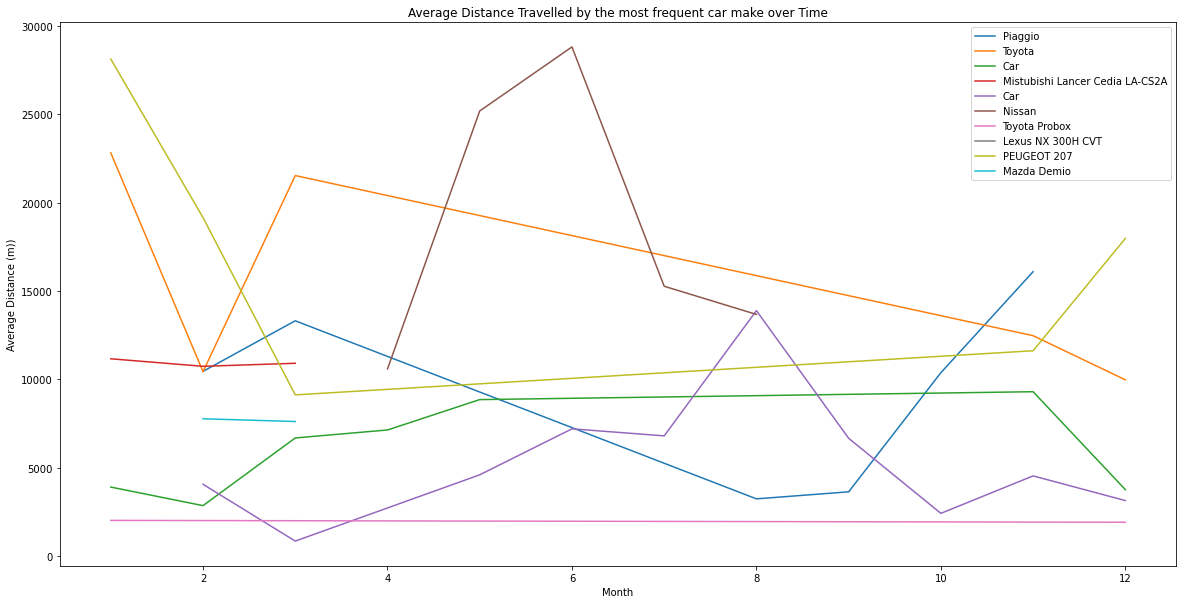

In [51]:
# identify trends in trips_df dataframe over time (day, week, month) for the different vehicle makes and make categories (small, medium)
plt.figure(figsize=(20, 10))
plt.plot(merged_df[merged_df['make'] == 'PIAGGIO'].groupby('created_month')['distance'].mean(), label='Piaggio')
plt.plot(merged_df[merged_df['make'] == 'TOYOTA'].groupby('created_month')['distance'].mean(), label='Toyota')
plt.plot(merged_df[merged_df['make'] == 'CAR'].groupby('created_month')['distance'].mean(), label='Car')
plt.plot(merged_df[merged_df['make'] == 'MITSUBISHI Lancer Cedia LA-CS2A'].groupby('created_month')['distance'].mean(), label='Mistubishi Lancer Cedia LA-CS2A')
plt.plot(merged_df[merged_df['make'] == 'Car'].groupby('created_month')['distance'].mean(), label='Car')
plt.plot(merged_df[merged_df['make'] == 'Nissan'].groupby('created_month')['distance'].mean(), label='Nissan')
plt.plot(merged_df[merged_df['make'] == 'TOYOTA PROBOX'].groupby('created_month')['distance'].mean(), label='Toyota Probox')
plt.plot(merged_df[merged_df['make'] == 'Lexus NX 300H CVT'].groupby('created_month')['distance'].mean(), label='Lexus NX 300H CVT')
plt.plot(merged_df[merged_df['make'] == 'PEUGEOT 207'].groupby('created_month')['distance'].mean(), label='PEUGEOT 207')
plt.plot(merged_df[merged_df['make'] == 'MAZDA Demio'].groupby('created_month')['distance'].mean(), label='Mazda Demio')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Distance (m))')
plt.title('Average Distance Travelled by the most frequent car make over Time')
plt.show()

In [52]:
merged_df.to_csv('Data/merged_df.csv', index=False)

In [ ]:
def avg_distance_by_makes_lineplots(df_query, label, xlabel, ylabel, title):
    plt.figure(figsize=(20, 10))
    plt.plot(df_query, label)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
 
avg_distance_by_makes_lineplots(merged_df.groupby(["created_day", "make"])["distance"].mean().sort_index(), merged_df["make"].unique(), 'Days of the week', 'Average Distance in (m)', 'Average distance covered by different asset makes')   
# refine the code above to plot the average distance travelled by different makes of vehicles over time (day, week, month)
avg_distance_by_makes_lineplots(merged_df.groupby(["created_week", "make"])["distance"].mean().sort_index(), merged_df["make"].unique(), 'Weeks of the year', 'Average Distance in (m)', 'Average distance covered by different asset makes')